# Imputing missing values

In [1]:
import pandas as pd
from io import StringIO

In [2]:

csv_data = '''A,B,C,D
1.0,2.0,3.0,4.0
5.0,6.0,,8.0
10.0,11.0,12.0,'''

df = pd.read_csv(StringIO(csv_data))
print(df)


      A     B     C    D
0   1.0   2.0   3.0  4.0
1   5.0   6.0   NaN  8.0
2  10.0  11.0  12.0  NaN


In [3]:
df.isnull().sum()

,0
A,0
B,0
C,1
D,1


Convenient data handling with pandas' data frames

In [4]:
df.values

array([[ 1.,  2.,  3.,  4.],
       [ 5.,  6., nan,  8.],
       [10., 11., 12., nan]])

## One of the easiest ways to deal with missing data is simply to remove the corresponding features (columns) or training examples (rows) from the dataset

In [5]:
df.dropna(axis=0)

,A,B,C,D
0,1.0,2.0,3.0,4.0


In [6]:
df.dropna(axis=1)

,A,B
0,1.0,2.0
1,5.0,6.0
2,10.0,11.0


from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['A'].plot(kind='hist', bins=20, title='A')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['B'].plot(kind='hist', bins=20, title='B')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3.plot(kind='scatter', x='index', y='A', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='A', y='B', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_5.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['A']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'A'}, axis=1)
              .sort_values('A', ascending=True))
  xs = counted['A']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_6.sort_values('A', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('A')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['B']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'B'}, axis=1)
              .sort_values('B', ascending=True))
  xs = counted['B']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_7.sort_values('B', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('B')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_8['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['A'].plot(kind='line', figsize=(8, 4), title='A')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['B'].plot(kind='line', figsize=(8, 4), title='B')
plt.gca().spines[['top', 'right']].set_visible(False)

In [7]:
# only drop rows where all columns are NaN
# (returns the whole array here since we don't
# have a row with all values NaN)
df.dropna(how='all')

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


In [8]:
# drop rows that have fewer than 4 real values
df.dropna(thresh=4)

,A,B,C,D
0,1.0,2.0,3.0,4.0


In [9]:
# only drop rows where NaN appear in specific columns (here: 'C')
df.dropna(subset=['C'])

,A,B,C,D
0,1.0,2.0,3.0,4.0
2,10.0,11.0,12.0,NaN


##Imputing missing values

In [10]:
from sklearn.impute import SimpleImputer
import numpy as np
imr=SimpleImputer(missing_values=np.nan, strategy='mean')
imr=imr.fit(df.values)
imputed_data=imr.transform(df.values)
imputed_data

array([[ 1. ,  2. ,  3. ,  4. ],
       [ 5. ,  6. ,  7.5,  8. ],
       [10. , 11. , 12. ,  6. ]])

In [11]:
df.fillna(df.mean())

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,7.5,8.0
2,10.0,11.0,12.0,6.0


In [12]:
df.mean()

,0
A,5.333333
B,6.333333
C,7.500000
D,6.000000


# Handling categorical data

In [13]:
df = pd.DataFrame([
['green', 'M', 10.1, 'class2'],
['red', 'L', 13.5, 'class1'],
['blue', 'XL', 15.3, 'class2']])
df.columns = ['color', 'size', 'price', 'classlabel']
df

,color,size,price,classlabel
0,green,M,10.1,class2
1,red,L,13.5,class1
2,blue,XL,15.3,class2


**Mapping ordinal features**

In [14]:
size_mapping={
    'M':0,
    'L':1,
    'XL':2
}

df['size']=df['size'].map(size_mapping)
df

,color,size,price,classlabel
0,green,0,10.1,class2
1,red,1,13.5,class1
2,blue,2,15.3,class2


In [15]:
inv_size_mapping={v:k for k,v in size_mapping.items()}
df['size'].map(inv_size_mapping)
df

,color,size,price,classlabel
0,green,0,10.1,class2
1,red,1,13.5,class1
2,blue,2,15.3,class2


**Encoding class labels**

In [27]:
le = LabelEncoder()
le.fit(df['classlabel'])
list(le.classes_)
df.classlabel=le.transform(df.classlabel)
df

,color,size,price,classlabel
0,green,0,10.1,1
1,red,1,13.5,0
2,blue,2,15.3,1


In [28]:
df['classlabel']=le.inverse_transform(df['classlabel'])
df

,color,size,price,classlabel
0,green,0,10.1,class2
1,red,1,13.5,class1
2,blue,2,15.3,class2


**Performing one-hot encoding on nominal features**

In [29]:
from sklearn.preprocessing import OneHotEncoder
X = df[['color', 'size', 'price']].values
color_ohe = OneHotEncoder()
X

array([['green', 0, 10.1],
       ['red', 1, 13.5],
       ['blue', 2, 15.3]], dtype=object)

In [30]:
 color_ohe.fit_transform(X[:, 0].reshape(-1, 1)).toarray()

array([[0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.]])

In [31]:
from sklearn.compose import ColumnTransformer
X=df[['color', 'size', 'price']].values
c_transf=ColumnTransformer([('onehot', OneHotEncoder(),[0]),
                            ('nothing', 'passthrough', [1,2])])
c_transf.fit_transform(X).astype(float)

array([[ 0. ,  1. ,  0. ,  0. , 10.1],
       [ 0. ,  0. ,  1. ,  1. , 13.5],
       [ 1. ,  0. ,  0. ,  2. , 15.3]])

In [32]:
pd.get_dummies(df[['price', 'color', 'size']])

,price,size,color_blue,color_green,color_red
0,10.1,0,False,True,False
1,13.5,1,False,False,True
2,15.3,2,True,False,False


# Partitioning a dataset into separate training and test datasets

In [10]:
import numpy as np
import pandas as pd
df_wine = pd.read_csv(
 'https://archive.ics.uci.edu/ml/'
 'machine-learning-databases/wine/wine.data',
 header=None)

In [11]:
df_wine

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [12]:
 df_wine.columns = ['Class label', 'Alcohol',
                    'Malic acid', 'Ash',
                    'Alcalinity of ash', 'Magnesium',
                    'Total phenols', 'Flavanoids',
                    'Nonflavanoid phenols',
                    'Proanthocyanins',
                    'Color intensity', 'Hue',
                    'OD280/OD315 of diluted wines',
                    'Proline']

In [13]:
np.unique(df_wine['Class label'])

array([1, 2, 3])

In [14]:
 df_wine.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [15]:
from sklearn.model_selection import train_test_split
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

# Bringing features onto the same scale

**StandardScaler**

In [16]:
from sklearn.preprocessing import StandardScaler
stdsc=StandardScaler()
X_train_std=stdsc.fit_transform(X_train)
X_test_std=stdsc.transform(X_test)

**Normalization**

In [18]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
X_train_norm=mms.fit_transform(X_train)
X_test_norm=mms.transform(X_test)

**RobustScaler**

# Regularization

In [20]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(penalty='l1', C=1.0, solver='liblinear', multi_class='ovr')
lr.fit(X_train_std, y_train)
print('Training accuracy:', lr.score(X_train_std, y_train))
print('Test accuracy:', lr.score(X_test_std, y_test))

Training accuracy: 1.0
Test accuracy: 1.0


In scikit-learn, the intercept_ corresponds to 𝑤𝑤0 and coef_
corresponds to the values 𝑤𝑤𝑗𝑗 for j > 0

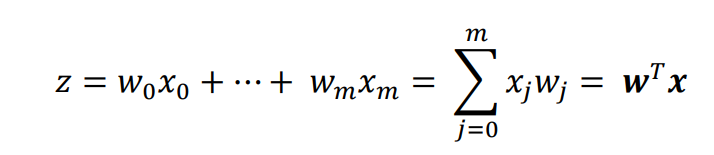

In [21]:
lr.intercept_

array([-1.26314782, -1.21618632, -2.37070968])

In [22]:
lr.coef_

array([[ 1.24616522,  0.18051207,  0.74201574, -1.15967445,  0.        ,
         0.        ,  1.17468361,  0.        ,  0.        ,  0.        ,
         0.        ,  0.5417847 ,  2.51139775],
       [-1.53663228, -0.38755646, -0.99550115,  0.36545134, -0.05942591,
         0.        ,  0.66831184,  0.        ,  0.        , -1.93446094,
         1.23273736,  0.        , -2.2320747 ],
       [ 0.13587065,  0.16839511,  0.3572525 ,  0.        ,  0.        ,
         0.        , -2.43801854,  0.        ,  0.        ,  1.56345207,
        -0.81913928, -0.49262495,  0.        ]])

The weight array that we accessed via the lr.coef_ attribute contains three rows of
weight coefficients, one weight vector for each class. Each row consists of 13 weights,
where each weight is multiplied by the respective feature in the 13-dimensional
Wine dataset to calculate the net input

In the last example on regularization in this chapter, we will vary the regularization
strength and plot the regularization path—the weight coefficients of the different
features for different regularization strengths

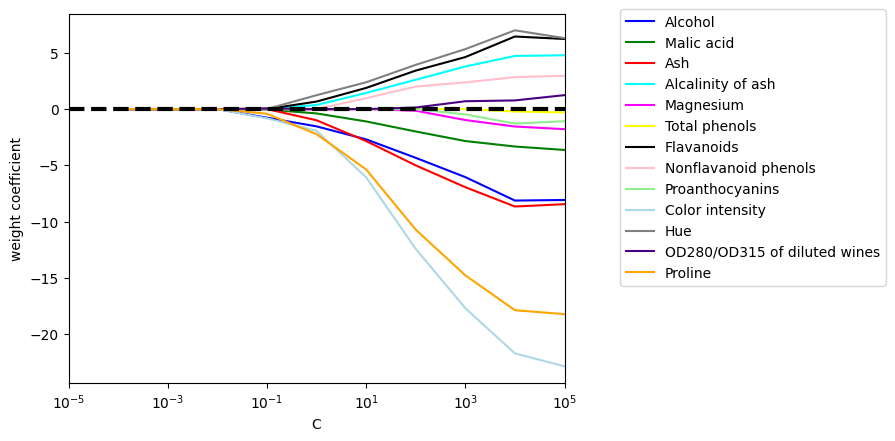

In [27]:
import matplotlib.pyplot as plt
fig=plt.figure()
ax=plt.subplot(111)
colors = ['blue', 'green', 'red', 'cyan',
           'magenta', 'yellow', 'black',
           'pink', 'lightgreen', 'lightblue',
           'gray', 'indigo', 'orange']
weights, params= [],[]
for c in np.arange(-4.0,6.0):
  lr=LogisticRegression(penalty='l1', C=10.0**c, solver='liblinear', multi_class='ovr', random_state=0)
  lr.fit(X_train_std, y_train)
  weights.append(lr.coef_[1])
  params.append(10**c)

weights=np.array(weights)
for column, color in zip(range(weights.shape[1]), colors):
  plt.plot(params, weights[:, column],label=df_wine.columns[column+1],
           color=color)

plt.axhline(0, color='black', linestyle='--', linewidth=3)
plt.xlim([10**(-5), 10**5])
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.xscale('log')
plt.legend(loc='upper left')
ax.legend(loc='upper center', bbox_to_anchor=(1.38, 1.03), ncol=1, fancybox=True)
plt.show()